<figure> 
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Ciencia de Datos</center></span>

# <span style="color:green"><center>Detección de anomalías</center></span>

## <span style="color:#4361EE">Profesores</span>

* Alvaro  Montenegro, PhD, <ammontenegrod@unal.edu.co>
* Campo Elías Pardo, PhD, <cepardot@unal.edu.co>
* Daniel  Montenegro, Msc, <dextronomo@gmail.com>
* Camilo José Torres Jiménez, Msc, <cjtorresj@unal.edu.co>

##   <span style="color:#4361EE">Estudiantes auxiliares</span>

* Jessica López, jelopezme@unal.edu.co
* Camilo Chitivo, cchitivo@unal.edu.co
* Daniel Rojas, anrojasor@unal.edu.co

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

* Maria del Pilar Montenegro, pmontenegro88@gmail.com
* Jessica López Mejía, jelopezme@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

* Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

* David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

* Dairo Moreno, damoralesj@unal.edu.co
* Joan Castro, jocastroc@unal.edu.co
* Bryan Riveros, briveros@unal.edu.co
* Rosmer Vargas, rovargasc@unal.edu.co
* Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

* Giovvani Barrera, udgiovanni@gmail.com
* Camilo Chitivo, cchitivo@unal.edu.co

##   <span style="color:blue">Introducción</span>
 

Uno de los casos de aplicación que más se ven en la vida real es la detección de anomalías. Esta implica el buscar, y encontrar, entre las observaciones obtenidas, los datos cuyo comportamiento es diferente de lo "usual". 

###   <span style="color:blue">Diferencia entre "Anomalía" y "Atípico"</span>
 

Antes de continuar, es necesario conocer la diferencia entre dos terminos.

la respuesta más sencilla es que no hay diferencia. Estos dos terminos implican datos que son altamente distintos del resto del conjunto de datos.

Tratando de ser más específicos, podemos definir algunas diferencias:

- Los datos atípicos son datos que provienen de la misma distribución que la del resto del conjunto de datos, solo que son casos extremos/alejados

- Las anomalías provienen de un proceso externo o de otra distribución que afecta el conjunto original. Por ejemplo ruido.

Además, ya tenemos forma de obtener datos atípicos, usando el "Rango intercuartílico". Mientras que no tenemos ninguna forma "algorítmica" para definir lo que es una anomalía.

###   <span style="color:blue">Aplicación en el Internet de las cosas</span>
 

La detección de anomalías tiene aplicación en muchos lados, pero donde se han dado varios casos de uso ha sido en el el Internet de las cosas (IoT) y el mantenimiento predictivo

<figure> 
<center>
<img src="../Imagenes/predictive-maintenance-diagram.svg"/> 
</center>
</figure>

##   <span style="color:blue">Aplicación</span>

Un sistema de detección puede hacerse de dos maneras:

- De la mano de un experto en el caso específico, que pueda decirnos "límites" y relaciones con los datos que nos permitan definir directamente qué es un dato con comportamiento regular y, subsecuentemente, qué datos se salen de estos.
- Analizando datos obtenidos que tengan casos anomalos y así, por medio de aprendizaje automátizado, ajustar un modelo que pueda diferenciar estos datos.

El segundo caso ha probado ser el mejor, o por lo menos el más flexible y amigable de trabajar, pero viene con sus pequeñas debilidades.

- Necesitamos muchos datos para un buen ajuste del modelo.
- Necesitamos una buena cantidad de "fallos" o de casos de hipótesis positiva.


Los casos de detección, y sus respectivas formas de atacarlos, se pueden separar dependiendo de la forma de nuestros conjuntos de datos.

###   <span style="color:blue">Caso supervisado</span>

Podemos encontrar conjuntos de datos en los que directamente nos dicen si las observaciones son anómalas o no. En esta situación utilizamos modelos de clasificación binaria que ya hemos visto antes.

Aquí introducimos el paquete `PyOd`. El más utilizado y predilecto para los casos de detección de anomalías. Pero podríamos usar Scikit learn para este ejercicio

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data

In [2]:
# definimos el porcentaje de anomalías
outlier_fraction = 0.1

# generamos un dataset con dos variables independientes
X_train, X_test, y_train, y_test = generate_data(
    n_train=400, n_test=100, random_state=42, n_features=2)
 
# Obtenemos y separamos las dos características
f1 = X_train[:, [0]].reshape(-1, 1)
f2 = X_train[:, [1]].reshape(-1, 1)

Text(0, 0.5, 'Feature 2')

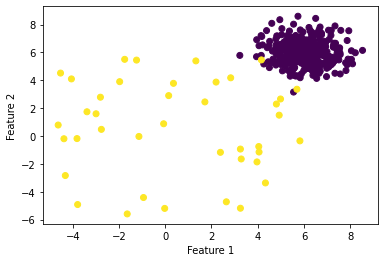

In [3]:
# scatter plot
plt.scatter(f1, f2, c=y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

EL número de errores obtenidos es 3


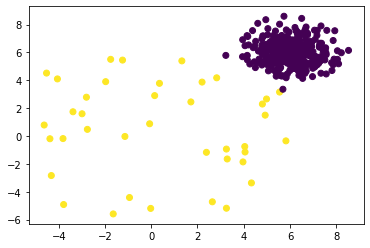

In [4]:
from sklearn.neighbors import KNeighborsClassifier
# Entrenamos el clasificador
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = clf.predict(X_train)
n_errors = (y_pred != y_train).sum()
# Contamos el número de errores en la predicción
print('EL número de errores obtenidos es ' + str(n_errors))
plt.scatter(f1, f2, c=y_pred)

###   <span style="color:blue">Caso no supervisado</span>

En este contexto no sabemos cuáles datos son aquellos que son anómalos. Solo suponemos que existe un pequeño porcentaje de datos que actúan de manera distinta al resto.

Aquí es necesario utilizar algoritmos diferentes. Aunque empezamos con uno conocido.

###   <span style="color:blue">Nearest Neighbors Search</span>

Recordando el Algoritmo "K Nearest Neighbors", este lo utilizamos para clasificar datos con base en los datos que están más cercanos a este. Nosotros podemos utilizar parte de la filosofía de este modelo y adaptarla a un contexto no supervisado.

Como hemos visto en la visualización, las anomalías probablemente estén más alejadas del resto de datos. Así que podemos analizar las distancias de estos puntos y definir como anomalos a aquellos que tengan los valores de distancia más altos. Podemos aprovecharnos de las nociones de distancia multivariada con las que trabaja el algoritmo KNN para este beneficio.

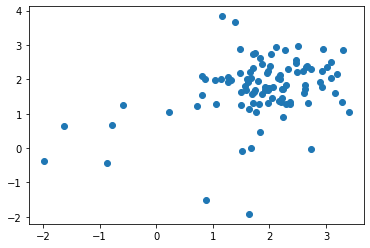

In [5]:
from sklearn.neighbors import NearestNeighbors
X_train, X_test, y_train, y_test = generate_data(
    n_train=400, n_test=100, random_state=13, n_features=6)
f1_t = X_test[:, [0]].reshape(-1, 1)
f2_t = X_test[:, [1]].reshape(-1, 1)
plt.scatter(f1_t, f2_t)

In [6]:
# create model
nbrs = NearestNeighbors(n_neighbors = 5).fit(X_train)
distances, indexes = nbrs.kneighbors(X_test)

In [7]:
import pandas as pd
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis=1)
distances_mean.describe()

count    100.000000
mean       0.994518
std        0.470216
min        0.532703
25%        0.728590
50%        0.818040
75%        1.059265
max        2.754588
dtype: float64

In [8]:
th = 2
outlier_index = np.where(distances_mean > th)
outlier_index

(array([90, 91, 92, 94, 96, 97, 98, 99]),)

In [9]:
real_index = np.where(y_test == 1.0)
print(real_index)

(array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)


El número de predicciones erroneas es 0


Text(0.5, 1.0, 'Caso real')

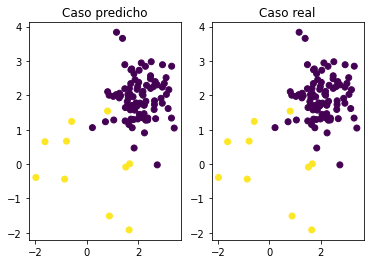

In [10]:
from pyod.models.knn import KNN
clf = KNN().fit(X_train)
y_pred = clf.predict(X_test)
n_errors = (y_pred != y_test).sum()
# Counting the number of errors
print('El número de predicciones erroneas es ' + str(n_errors))

fig, [ax1,ax2] = plt.subplots(1,2)
ax1.scatter(f1_t, f2_t, c=y_pred)
ax1.set_title("Caso predicho")
ax2.scatter(f1_t, f2_t, c=y_test)
ax2.set_title("Caso real")

###   <span style="color:blue">Bosques de Isolación</span>

Alguno conoce la teoría del bufalo? 

<figure> 
<center>
<img src="../Imagenes/buffalo_herd-DMID1-5g6y0g7qr-500x282.gif"/> 
</center>
</figure>

Supuestamente estos se mueven tan rápido como el más lento en su manada. Y cuando este es cazado, la velocidad general aumenta. Esto es más o menos la idea de los bosques de isolación. La idea aquí es hacer "particiones" de los datos a partir de sus diferentes características. El algoritmo funciona así:

- seleccionamos un atributo X del conjunto de datos y un valor q para separar X
    - Si en uno de los subconjuntos solo tiene un valor, este se considera un anómalo
- Repetimos la separación N veces y con todas las características.
Suponemos que los datos anomalos son aquellos que se separan más rápido del conjunto a partir de estos datos.

<figure> 
<center>
<img src="../Imagenes/Isolation-Forest-learned-iForest-construction-for-toy-dataset.png" height="250" width="400"> 
</center>
</figure>

<figure> 
<center>
<img src="../Imagenes/1_6GFMewU1Aax57nsW2uSakQ.png" height="400" width="600"> 
</center>
</figure>

Esta tecnica se aprovecha de dos propiedades de los datos anómalos.

- Los datos anómalos son pocos. Una cantidad muy reducida.
- Los datos anómalos están muy alejados del conglomerado

Text(0.5, 1.0, 'Caso real')

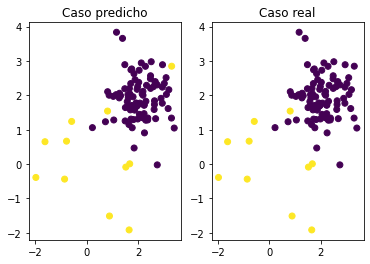

In [11]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(X_train)
y_pred = clf.predict(X_test)
fig, [ax1,ax2] = plt.subplots(1,2)
ax1.scatter(f1_t, f2_t, c=y_pred*-1)
ax1.set_title("Caso predicho")
ax2.scatter(f1_t, f2_t, c=y_test)
ax2.set_title("Caso real")

**Ejemplo de Sklearn**

Ejemplo tomado de la documentación oficial de [Sklearn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py)

En el ejemplo actual, mostramos dos formas de visualizar el límite de decisión de un Isolation Forest entrenado en un conjunto de datos de juguete.

**Generación de datos**

Generamos dos grupos (cada uno de ellos contiene n_samples) mediante muestreo aleatorio de la distribución normal estándar tal como se devuelve con numpy.random.randn. Uno de ellos es esférico y el otro está ligeramente deformado.

Para mantener la notación del Isolation Forest, a los valores normales (es decir, los grupos gaussianos) se les asigna una etiqueta de verdad fundamental de 1, mientras que a los valores anómalos (creados con numpy.random.uniform) se les asigna la etiqueta -1.

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

n_samples, n_outliers = 120, 40
rng = np.random.RandomState(0)
covariance = np.array([[0.5, -0.1], [0.7, 0.4]])
cluster_1 = 0.4 * rng.randn(n_samples, 2) @ covariance + np.array([2, 2])  # general
cluster_2 = 0.3 * rng.randn(n_samples, 2) + np.array([-2, -2])  # spherical
outliers = rng.uniform(low=-4, high=4, size=(n_outliers, 2))

X = np.concatenate([cluster_1, cluster_2, outliers])
y = np.concatenate(
    [np.ones((2 * n_samples), dtype=int), -np.ones((n_outliers), dtype=int)]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Se pueden visualizar los siguientes clusters

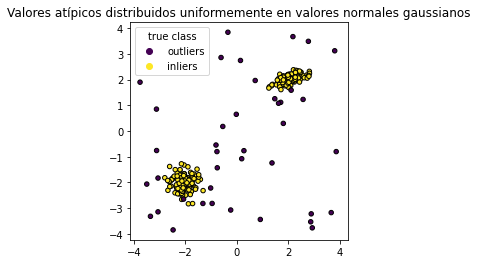

In [13]:
import matplotlib.pyplot as plt

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
handles, labels = scatter.legend_elements()
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.title("Valores atípicos distribuidos uniformemente en valores normales gaussianos")
plt.show()

**Entrenamiento del modelo**

In [14]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, random_state=0)
clf.fit(X_train)

IsolationForest(max_samples=100, random_state=0)

**Graficar límite de decisión discreto**

Utilizamos la clase "DecisionBoundaryDisplay" para visualizar un límite de decisión discreto. El color de fondo representa si una muestra en esa área determinada se predice como un valor atípico o no. El gráfico de dispersión muestra las etiquetas reales.

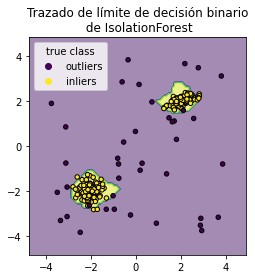

In [15]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Trazado de límite de decisión binario\n de IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.show()

**Gráfica de la longitud del camino de la frontera de decisión**

Al establecer `response_method="decision_function"`, el fondo de la exhibición de la Frontera de Decisión representa la medida de normalidad de una observación. Dicha puntuación se obtiene a través de la longitud del camino promediada sobre un conjunto de árboles aleatorios, que a su vez está determinada por la profundidad de la hoja (o, de manera equivalente, el número de divisiones) requerida para aislar una muestra específica.

Cuando un conjunto de árboles aleatorios produce en conjunto longitudes de camino cortas para aislar algunas muestras particulares, es altamente probable que sean anomalías y la medida de normalidad se acerca a 0. Del mismo modo, caminos largos corresponden a valores cercanos a 1 y son más propensos a ser valores normales.

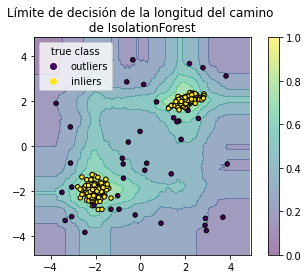

In [16]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Límite de decisión de la longitud del camino \n de IsolationForest ")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()

###   <span style="color:blue">Clasificación de una clase/SVM de una clase</span>

Los algoritmos de clasificación en una clase son todos los algoritmos que buscan poder diferenciar muestras de una sola clase. Esto permite crear modelos que puedan discernir entre pequeñas diferencias en datos que provienen de una misma clase. El algoritmo que ha probado ser el más ideal es usando máquinas de soporte vectorial

Hemos visto cómo funcionan exactamente los modelos SVM para clasificación binaria o multiclase: Generando un hiperplano que maximice el margen entre clases.

<figure> 
<center>
<img src="../Imagenes/1_ZpkLQf2FNfzfH4HXeMw4MQ.png" height="250" width="700"> 
</center>
</figure>

En este nuevo caso también generamos un hiperplano, pero como no tenemos "clases" como tal, el algoritmo busca generar un hiperplano, o en ciertos casos una "hiperesfera", que trate de contener la mayor cantidad de los datos posibles. 

Hay dos posibles casos o interpretaciones que esencialmente llegan a lo mismo: 

- Caso [Bernhard Scholkopf](https://proceedings.neurips.cc/paper/1999/file/8725fb777f25776ffa9076e44fcfd776-Paper.pdf): Se genera un hiperplano que trata de maximizar el margen entre el origen y los datos. Cualquier dato que quede fuera de esa separación.

- Caso  [Tax & Duin](https://link.springer.com/content/pdf/10.1023/B:MACH.0000008084.60811.49.pdf): Se elige un centroide de los datos y se genera una hiperesfera que trate de cubrir la mayor cantidad de datos


Text(0.5, 1.0, 'Caso real')

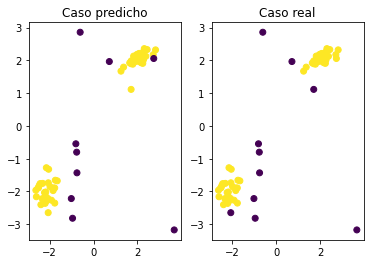

In [17]:
from sklearn.svm import OneClassSVM

one_svm = OneClassSVM(gamma='auto', nu=0.01).fit(X_train)

y_pred = one_svm.predict(X_test)

fig, [ax1,ax2] = plt.subplots(1,2)
f1_t = X_test[:, [0]].reshape(-1, 1)
f2_t = X_test[:, [1]].reshape(-1, 1)
ax1.scatter(f1_t, f2_t, c=y_pred)
ax1.set_title("Caso predicho")
ax2.scatter(f1_t, f2_t, c=y_test)
ax2.set_title("Caso real")

Todos estos modelos son optimos, pero fallan mucho en datos de alta dimensionalidad. 

Si se quiere conseguir una detección de anomalías, es necesario entrar al terreno de la inteligencia artificial y los [AutoEncoders](https://nbviewer.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/M%C3%B3dulo%206-%20Autocodificadores/1.%20Autocodificadores%20generales/Cuadernos/ae_Example_Dense_mnist.ipynb)

###   <span style="color:blue">Clasificación de una clase/SVM de una clase con Descenso de Gradiente Estocástico (SGD)</span>

El algoritmo `SGDOneClassSVM` es una variante del `One-Class SVM` que utiliza el Descenso de Gradiente Estocástico (SGD) para ajustar los parámetros del modelo. El SGD es un método de optimización que es especialmente útil cuando se trabaja con conjuntos de datos grandes o de alta dimensionalidad, ya que permite un entrenamiento más eficiente y escalable del modelo.

A continuación, explicaremos los principales aspectos y parámetros del algoritmo `SGDOneClassSVM`:

1. **Detección de Anomalías Unimodal**: El `SGDOneClassSVM` se utiliza principalmente para detectar anomalías en conjuntos de datos unimodales, es decir, cuando se espera que la mayoría de los datos sigan una única distribución o patrón.

2. **Función de Pérdida**: El algoritmo utiliza una función de pérdida específica llamada "huberized hinge loss" para el entrenamiento. Esta función de pérdida combina la función de pérdida hinge tradicional utilizada en SVM con la función de pérdida de tipo Huber para proporcionar robustez frente a valores atípicos.

3. **Parámetros Importantes**:
   - `alpha`: Controla la regularización L2 (también conocida como "ridge regularization"). Un valor más alto de `alpha` reduce la complejidad del modelo.
   - `l1_ratio`: Controla la proporción entre regularización L1 (también conocida como "lasso regularization") y L2. Un valor de 1 significa regularización L1 pura, mientras que 0 significa regularización L2 pura.
   - `epsilon`: Define el margen de aceptación para los puntos normales. Los puntos que caen dentro de este margen se consideran normales, mientras que los que caen fuera se consideran anomalías.

4. **Parámetro `nu`**: Este parámetro controla la proporción de valores atípicos esperados en el conjunto de datos. Un valor más bajo de `nu` significa que se espera una mayor proporción de valores atípicos, y viceversa.

5. **Entrenamiento**: El algoritmo ajusta los parámetros del modelo utilizando el SGD para minimizar la función de pérdida mencionada anteriormente.

6. **Predicción**: Una vez entrenado, el modelo puede predecir si una nueva muestra es una anomalía o no. Los valores predichos son -1 para anomalías y 1 para muestras normales.

7. **Escalabilidad**: La ventaja clave del `SGDOneClassSVM` radica en su escalabilidad. Puede manejar grandes conjuntos de datos y conjuntos de datos de alta dimensionalidad de manera eficiente gracias al Descenso de Gradiente Estocástico.

8. **Limitaciones**: El `SGDOneClassSVM` se adapta bien a problemas de detección de anomalías unimodales, pero puede no ser adecuado para datos multimodales o con estructuras de clase más complejas.

Este ejemplo muestra cómo aproximar la solución de `sklearn.svm.OneClassSVM` en el caso de un kernel RBF utilizando `sklearn.linear_model.SGDOneClassSVM`, una versión de Descenso de Gradiente Estocástico (SGD) del One-Class SVM. En primer lugar, se utiliza una aproximación de kernel para aplicar `sklearn.linear_model.SGDOneClassSVM`, que implementa un One-Class SVM lineal utilizando SGD.

Es importante destacar que `sklearn.linear_model.SGDOneClassSVM` escala de manera lineal con el número de muestras, mientras que la complejidad de un `sklearn.svm.OneClassSVM` con kernel es, en el mejor de los casos, cuadrática con respecto al número de muestras. El propósito de este ejemplo no es ilustrar los beneficios de dicha aproximación en términos de tiempo de cálculo, sino más bien mostrar que obtenemos resultados similares en un conjunto de datos de ejemplo.

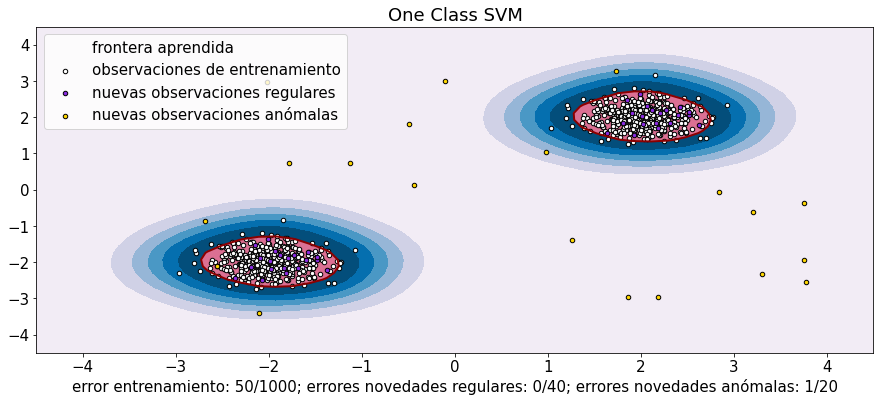

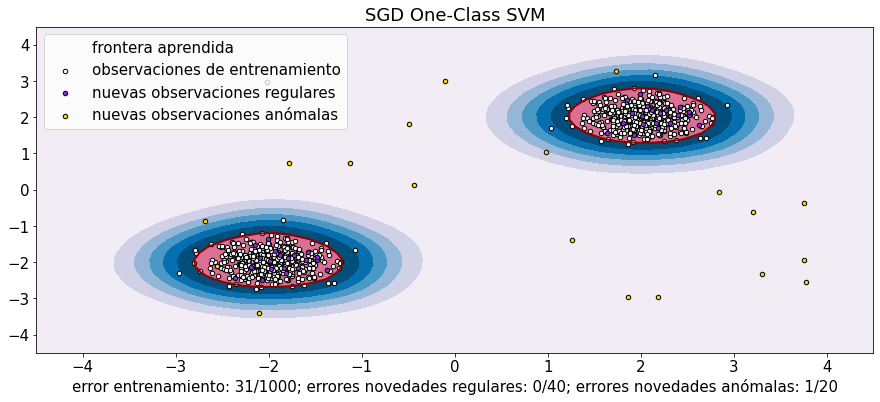

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDOneClassSVM
from sklearn.pipeline import make_pipeline
from sklearn.svm import OneClassSVM

font = {"weight": "normal", "size": 15}
matplotlib.rc("font", **font)
random_state = 42
rng = np.random.RandomState(random_state)

# Generar datos de entrenamiento
X = 0.3 * rng.randn(500, 2)
X_train = np.r_[X + 2, X - 2]
# Generar algunas observaciones regulares nuevas
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generar algunas observaciones nuevas anómalas
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

xx, yy = np.meshgrid(np.linspace(-4.5, 4.5, 50), np.linspace(-4.5, 4.5, 50))

# Hiperparámetros de OCSVM
nu = 0.05
gamma = 2.0

# Ajustar el One-Class SVM
clf = OneClassSVM(gamma=gamma, kernel="rbf", nu=nu)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Ajustar el One-Class SVM utilizando una aproximación de kernel y SGD
transform = Nystroem(gamma=gamma, random_state=random_state)
clf_sgd = SGDOneClassSVM(
    nu=nu, shuffle=True, fit_intercept=True, random_state=random_state, tol=1e-4
)
pipe_sgd = make_pipeline(transform, clf_sgd)
pipe_sgd.fit(X_train)
y_pred_train_sgd = pipe_sgd.predict(X_train)
y_pred_test_sgd = pipe_sgd.predict(X_test)
y_pred_outliers_sgd = pipe_sgd.predict(X_outliers)
n_error_train_sgd = y_pred_train_sgd[y_pred_train_sgd == -1].size
n_error_test_sgd = y_pred_test_sgd[y_pred_test_sgd == -1].size
n_error_outliers_sgd = y_pred_outliers_sgd[y_pred_outliers_sgd == 1].size

Z_sgd = pipe_sgd.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_sgd = Z_sgd.reshape(xx.shape)

# Graficar los niveles de la función de decisión
plt.figure(figsize=(15, 6))
plt.title("One Class SVM")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 20
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-4.5, 4.5))
plt.ylim((-4.5, 4.5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "frontera aprendida",
        "observaciones de entrenamiento",
        "nuevas observaciones regulares",
        "nuevas observaciones anómalas",
    ],
    loc="upper left",
)
plt.xlabel(
    "error entrenamiento: %d/%d; errores novedades regulares: %d/%d; errores novedades anómalas: %d/%d"
    % (
        n_error_train,
        X_train.shape[0],
        n_error_test,
        X_test.shape[0],
        n_error_outliers,
        X_outliers.shape[0],
    )
)
plt.show()

plt.figure(figsize=(15, 6))
plt.title("SGD One-Class SVM")
plt.contourf(xx, yy, Z_sgd, levels=np.linspace(Z_sgd.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z_sgd, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z_sgd, levels=[0, Z_sgd.max()], colors="palevioletred")

s = 20
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-4.5, 4.5))
plt.ylim((-4.5, 4.5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "frontera aprendida",
        "observaciones de entrenamiento",
        "nuevas observaciones regulares",
        "nuevas observaciones anómalas",
    ],
    loc="upper left",
)
plt.xlabel(
    "error entrenamiento: %d/%d; errores novedades regulares: %d/%d; errores novedades anómalas: %d/%d"
    % (
        n_error_train_sgd,
        X_train.shape[0],
        n_error_test_sgd,
        X_test.shape[0],
        n_error_outliers_sgd,
        X_outliers.shape[0],
    )
)
plt.show()

###   <span style="color:blue">Factor de Anomalía Local (Local Outlier Factor - LOF)</span>

El siguiente material se extrajo de la documentación oficial de [Sklearn](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html#sphx-glr-auto-examples-neighbors-plot-lof-outlier-detection-py)

El algoritmo [Local Outlier Factor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor) (LOF) de la librería neighbors calcula un puntaje (llamado "factor de anomalía local") que refleja el grado de anormalidad de las observaciones. Mide la desviación de densidad local de un punto de datos dado en relación con sus vecinos. La idea es detectar las muestras que tienen una densidad sustancialmente menor que sus vecinos.

En la práctica, la densidad local se obtiene a partir de los k-vecinos más cercanos. El puntaje LOF de una observación es igual a la proporción entre la densidad local promedio de sus k-vecinos más cercanos y su propia densidad local. Se espera que una instancia normal tenga una densidad local similar a la de sus vecinos, mientras que se espera que los datos anormales tengan una densidad local mucho menor.

El número k de vecinos considerados (también conocido como parámetro n_neighbors) generalmente se elige de la siguiente manera: 1) debe ser mayor que el número mínimo de objetos que un clúster debe contener para que otros objetos puedan ser valores anómalos locales en relación con ese clúster, y 2) debe ser menor que el número máximo de objetos cercanos que pueden ser potencialmente valores atípicos locales. En la práctica, esta información generalmente no está disponible, y tomar n_neighbors=20 suele funcionar bien en general. Cuando la proporción de valores atípicos es alta (por ejemplo, mayor al 10 %, como en el ejemplo a continuación), n_neighbors debería ser mayor (n_neighbors=35 en el ejemplo a continuación).

La fortaleza del algoritmo LOF radica en que tiene en cuenta tanto las propiedades locales como globales de los conjuntos de datos: puede funcionar bien incluso en conjuntos de datos donde las muestras anómalas tienen densidades subyacentes diferentes. La pregunta no es cuán aislada está la muestra, sino cuán aislada está en relación con el vecindario circundante.

Cuando se aplica LOF para la detección de valores atípicos, no existen métodos predict, decision_function ni score_samples, sino solo un método fit_predict. Los puntajes de anormalidad de las muestras de entrenamiento son accesibles a través del atributo negative_outlier_factor_. Es importante señalar que predict, decision_function y score_samples se pueden utilizar en nuevos datos no vistos cuando se aplica LOF para la detección de novedades, es decir, cuando el parámetro de novedad está configurado en True, pero el resultado de predict puede diferir de fit_predict.

**Generación de datos con outliers**

In [19]:
import numpy as np
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

**Ajusta el modelo para la detección de valores atípicos (por defecto).**

Utiliza "fit_predict" para calcular las etiquetas predichas de las muestras de entrenamiento (cuando se utiliza LOF para la detección de valores atípicos, el estimador no tiene métodos "predict," "decision_function" ni "score_samples").

In [20]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

**Gráfico de los resultados**

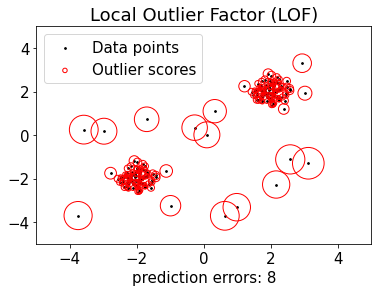

In [21]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection

def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])

plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

####   <span style="color:blue">Detección de Novedades con el Factor de Anomalía Local</span>

Para utilizar neighbors.LocalOutlierFactor en la detección de novedades, es decir, predecir etiquetas o calcular la puntuación de anormalidad de nuevos datos no vistos, debes instanciar el estimador con el parámetro "novelty" establecido en True antes de ajustar el estimador:

In [22]:
lof = LocalOutlierFactor(novelty=True)
lof.fit(X_train)

LocalOutlierFactor(novelty=True)

Ten en cuenta que en este caso, no está disponible la función "fit_predict" para evitar inconsistencias.

**Advertencia**

Detección de novedades con el Factor de Anomalía Local (Local Outlier Factor - LOF)

Cuando se establece "novelty" en True, ten en cuenta que solo debes utilizar "predict," "decision_function" y "score_samples" en nuevos datos no vistos y no en las muestras de entrenamiento, ya que esto podría conducir a resultados incorrectos. Es decir, el resultado de "predict" no será igual que el de "fit_predict". Las puntuaciones de anormalidad de las muestras de entrenamiento siempre están disponibles a través del atributo "negative_outlier_factor_".

La detección de novedades con el Factor de Anomalía Local (Local Outlier Factor - LOF) se ilustra a continuación.

<figure> 
<center>
<img src="../Imagenes/sphx_glr_plot_lof_novelty_detection_001.png" height="250" width="700"> 
</center>
</figure>

El algoritmo Local Outlier Factor (LOF) es una herramienta versátil que puede emplearse tanto en la detección de anomalías como en la identificación de novedades en conjuntos de datos. En su enfoque no supervisado, LOF evalúa la densidad local de cada punto de datos en relación con sus vecinos, permitiendo identificar aquellos que exhiben una densidad significativamente diferente a la de sus entornos cercanos, ya sea como valores atípicos o como novedades. A lo largo de este cuaderno, hemos explorado su implementación en Scikit-Learn, destacando su uso común en la detección de valores atípicos. Además, hemos comprendido cómo ajustar el modelo y calcular las etiquetas de predicción para las muestras de entrenamiento mediante "fit_predict". Es importante recordar que, cuando LOF se emplea para la detección de novedades, también puede utilizarse para identificar patrones nuevos y no necesariamente anómalos en los datos. Este cuaderno también nos ha brindado un ejemplo práctico de generación de datos que incorporan tanto valores atípicos como novedades, y hemos visualizado los resultados utilizando gráficos de dispersión. En última instancia, LOF se revela como una herramienta poderosa para la detección y la identificación de patrones inusuales o nuevos en una variedad de aplicaciones, lo que puede ser esencial en la toma de decisiones y la detección temprana de problemas en conjuntos de datos complejos.

###   <span style="color:blue">Estimación robusta de covarianza y relevancia de distancias de Mahalanobis</span>

El siguiente material se extrajo de la documentación oficial de [Sklearn](https://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html#sphx-glr-auto-examples-covariance-plot-mahalanobis-distances-py)

Una forma común de realizar la detección de valores atípicos es asumir que los datos regulares provienen de una distribución conocida (por ejemplo, los datos tienen una distribución gaussiana). A partir de esta suposición, generalmente intentamos definir la "forma" de los datos y podemos considerar como observaciones atípicas aquellas que se encuentran lo suficientemente lejos de la forma ajustada.

Scikit-learn proporciona un objeto llamado [covariance.EllipticEnvelope](https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html#sklearn.covariance.EllipticEnvelope) que ajusta una estimación de covarianza robusta a los datos y, por lo tanto, ajusta una elipse a los puntos de datos regulares, ignorando los puntos anómalos.

Por ejemplo, supongamos que los datos regulares están distribuidos de manera gaussiana; el algoritmo estimará de manera robusta (es decir, sin verse influenciado por valores atípicos) la localización y la covarianza de dichos datos regulares. Las distancias de Mahalanobis obtenidas a partir de esta estimación se utilizan para calcular una medida de anormalidad.

Para datos distribuidos de manera gaussiana, la distancia de una observación al modo de la distribución se puede calcular utilizando su distancia de Mahalanobis:

$$d_{(\mu,\Sigma)}(x_i)^2 = (x_i - \mu)^T\Sigma^{-1}(x_i - \mu)$$

donde $\mu$ y $\Sigma$ son las medias y la matriz de covarianza de las distribuciones gaussianas subyacentes.

En la práctica, $\mu$ y $\Sigma$ se reemplazan por algunas estimaciones. La estimación de máxima verosimilitud (MLE, por sus siglas en inglés) de la covarianza estándar es muy sensible a la presencia de valores atípicos en el conjunto de datos y, por lo tanto, las distancias de Mahalanobis resultantes también lo son. Sería mejor utilizar un estimador robusto de la covarianza para garantizar que la estimación sea resistente a observaciones "erróneas" en el conjunto de datos y que las distancias de Mahalanobis calculadas reflejen con precisión la verdadera organización de las observaciones.

El estimador de Determinante de Covarianza Mínima (MCD) es un estimador robusto con alto punto de ruptura de la covarianza (es decir, puede utilizarse para estimar la matriz de covarianza de conjuntos de datos altamente contaminados, hasta $\frac{n_\text{samples}-n_\text{features}-1}{2}$ valores atípicos). La idea detrás del MCD es encontrar $\frac{n_\text{samples}+n_\text{features}+1}{2}$ observaciones cuya covarianza empírica tenga el determinante más pequeño, lo que produce un subconjunto "puro" de observaciones a partir del cual calcular estimaciones estándar de localización y covarianza. 

Este ejemplo ilustra cómo las distancias de Mahalanobis se ven afectadas por los datos atípicos. Las observaciones extraídas de una distribución contaminante no son distinguibles de las observaciones que provienen de la verdadera distribución gaussiana cuando se utilizan distancias de Mahalanobis basadas en la covarianza estándar MLE. Sin embargo, al utilizar distancias de Mahalanobis basadas en el MCD, las dos poblaciones se vuelven distinguibles. Las aplicaciones asociadas incluyen la detección de valores atípicos, la clasificación de observaciones y la agrupación.

**Generar datos**

Primero, generamos un conjunto de datos con 125 muestras y 2 características. Ambas características siguen una distribución gaussiana con una media de 0, pero la característica 1 tiene una desviación estándar igual a 2, mientras que la característica 2 tiene una desviación estándar igual a 1. A continuación, reemplazamos 25 muestras con muestras atípicas gaussianas, donde la característica 1 tiene una desviación estándar igual a 1 y la característica 2 tiene una desviación estándar igual a 7.

In [8]:
import numpy as np

# Para obtener resultados consistentes
np.random.seed(7)

n_muestras = 125
n_valores_atípicos = 25
n_características = 2

# Generar datos Gaussianos de forma (125, 2)
cov_generada = np.eye(n_características)
cov_generada[0, 0] = 2.0
X = np.dot(np.random.randn(n_muestras, n_características), cov_generada)
# Agregar algunos valores atípicos
cov_valores_atípicos = np.eye(n_características)
cov_valores_atípicos[np.arange(1, n_características), np.arange(1, n_características)] = 7.0
X[-n_valores_atípicos:] = np.dot(np.random.randn(n_valores_atípicos, n_características), cov_valores_atípicos)


**Comparación de resultados**

A continuación, ajustamos estimadores de covarianza basados en MCD y MLE a nuestros datos e imprimimos las matrices de covarianza estimadas. Observa que la varianza estimada de la característica 2 es mucho mayor con el estimador basado en MLE (7.5) que con el estimador robusto basado en MCD (1.2). Esto demuestra que el estimador robusto basado en MCD es mucho más resistente a las muestras atípicas, las cuales fueron diseñadas para tener una varianza mucho mayor en la característica 2.

In [9]:
import matplotlib.pyplot as plt

from sklearn.covariance import EmpiricalCovariance, MinCovDet

# ajustar un estimador robusto MCD a los datos
cov_robusto = MinCovDet().fit(X)
# ajustar un estimador MLE a los datos
cov_empirica = EmpiricalCovariance().fit(X)
print(
    "Matriz de covarianza estimada:\nMCD (Robusto):\n{}\nMLE:\n{}".format(
        cov_robusto.covariance_, cov_empirica.covariance_
    )
)

Matriz de covarianza estimada:
MCD (Robusto):
[[ 3.26253567e+00 -3.06695631e-03]
 [-3.06695631e-03  1.22747343e+00]]
MLE:
[[ 3.23773583 -0.24640578]
 [-0.24640578  7.51963999]]


Para visualizar mejor la diferencia, trazamos contornos de las distancias de Mahalanobis calculadas por ambos métodos. Observa que las distancias de Mahalanobis basadas en MCD robusto se ajustan mucho mejor a los puntos negros internos, mientras que las distancias basadas en MLE están más influenciadas por los puntos atípicos en rojo.

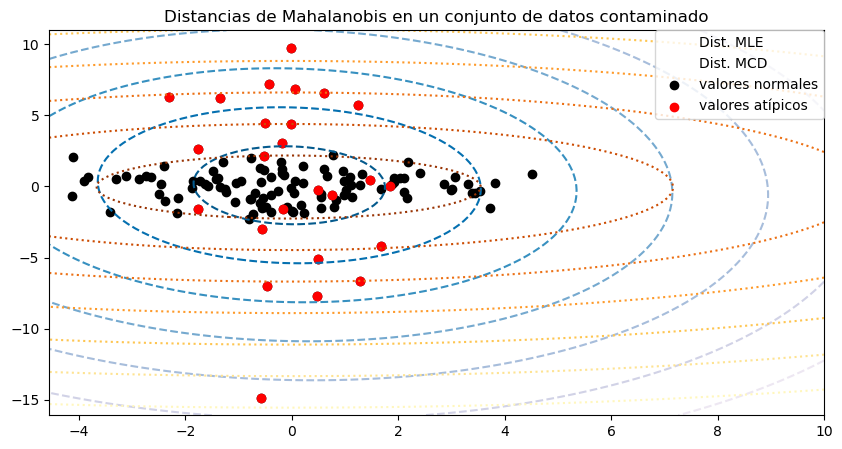

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
# Graficar el conjunto de datos
puntos_normales = ax.scatter(X[:, 0], X[:, 1], color="black", label="inliers")
puntos_atípicos = ax.scatter(
    X[:, 0][-n_outliers:], X[:, 1][-n_outliers:], color="red", label="outliers"
)
ax.set_xlim(ax.get_xlim()[0], 10.0)
ax.set_title("Distancias de Mahalanobis en un conjunto de datos contaminado")

# Crear una malla de valores de característica 1 y característica 2
xx, yy = np.meshgrid(
    np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
    np.linspace(plt.ylim()[0], plt.ylim()[1], 100),
)
zz = np.c_[xx.ravel(), yy.ravel()]
# Calcular las distancias de Mahalanobis basadas en MLE de la malla
dist_mahal_emp_cov = emp_cov.mahalanobis(zz)
dist_mahal_emp_cov = dist_mahal_emp_cov.reshape(xx.shape)
contorno_emp_cov = plt.contour(
    xx, yy, np.sqrt(dist_mahal_emp_cov), cmap=plt.cm.PuBu_r, linestyles="dashed"
)
# Calcular las distancias de Mahalanobis basadas en MCD
dist_mahal_robust_cov = robust_cov.mahalanobis(zz)
dist_mahal_robust_cov = dist_mahal_robust_cov.reshape(xx.shape)
contorno_robust_cov = ax.contour(
    xx, yy, np.sqrt(dist_mahal_robust_cov), cmap=plt.cm.YlOrBr_r, linestyles="dotted"
)

# Agregar leyenda
ax.legend(
    [
        contorno_emp_cov.collections[1],
        contorno_robust_cov.collections[1],
        puntos_normales,
        puntos_atípicos,
    ],
    ["Dist. MLE", "Dist. MCD", "valores normales", "valores atípicos"],
    loc="upper right",
    borderaxespad=0,
)

plt.show()

Finalmente, destacamos la capacidad de las distancias de Mahalanobis basadas en el MCD para distinguir valores atípicos. Tomamos la raíz cúbica de las distancias de Mahalanobis, obteniendo distribuciones aproximadamente normales (como sugieren Wilson y Hilferty [2]), luego representamos los valores de las muestras dentro y fuera del conjunto de valores atípicos con diagramas de caja. La distribución de las muestras atípicas está más separada de la distribución de las muestras normales para las distancias de Mahalanobis basadas en el MCD robusto.

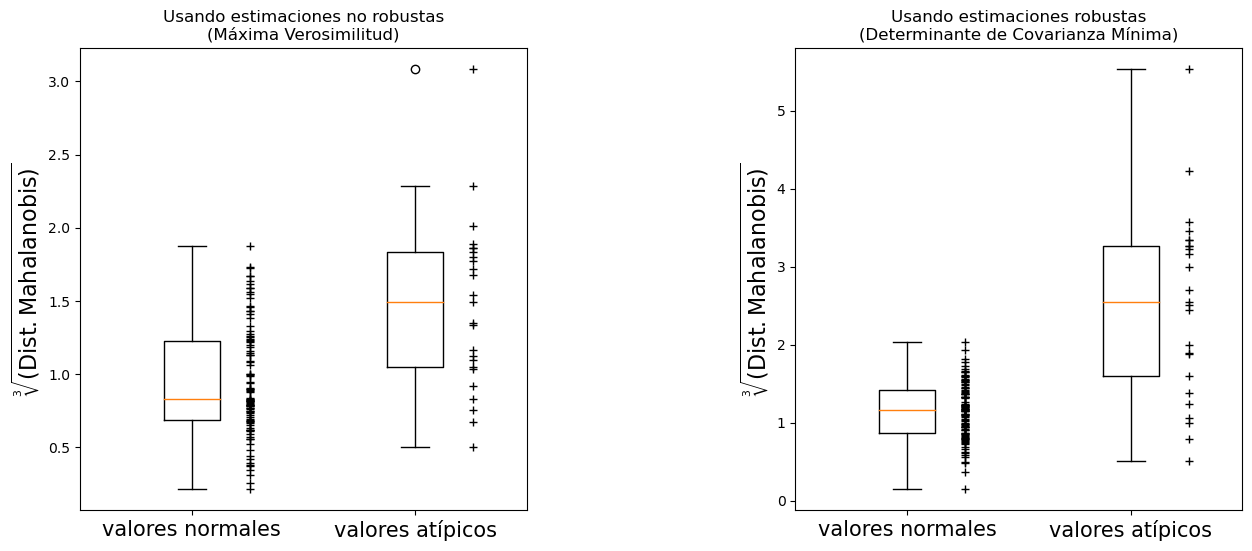

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

plt.subplots_adjust(wspace=0.6)

# Calcular la raíz cúbica de las distancias de Mahalanobis MLE para las muestras
mahal_emp = emp_cov.mahalanobis(X - np.mean(X, 0)) ** (0.33)
# Graficar diagramas de caja
ax1.boxplot([mahal_emp[:-n_outliers], mahal_emp[-n_outliers:]], widths=0.25)
# Graficar las muestras individuales
ax1.plot(
    np.full(n_samples - n_outliers, 1.26),
    mahal_emp[:-n_outliers],
    "+k",
    markeredgewidth=1,
)
ax1.plot(np.full(n_outliers, 2.26), mahal_emp[-n_outliers:], "+k", markeredgewidth=1)
ax1.axes.set_xticklabels(("valores normales", "valores atípicos"), size=15)
ax1.set_ylabel(r"$\sqrt[3]{\rm{(Dist. Mahalanobis)}}$", size=16)
ax1.set_title("Usando estimaciones no robustas\n(Máxima Verosimilitud)")

# Calcular la raíz cúbica de las distancias de Mahalanobis MCD para las muestras
mahal_robust = robust_cov.mahalanobis(X - robust_cov.location_) ** (0.33)
# Graficar diagramas de caja
ax2.boxplot([mahal_robust[:-n_outliers], mahal_robust[-n_outliers:]], widths=0.25)
# Graficar las muestras individuales
ax2.plot(
    np.full(n_samples - n_outliers, 1.26),
    mahal_robust[:-n_outliers],
    "+k",
    markeredgewidth=1,
)
ax2.plot(np.full(n_outliers, 2.26), mahal_robust[-n_outliers:], "+k", markeredgewidth=1)
ax2.axes.set_xticklabels(("valores normales", "valores atípicos"), size=15)
ax2.set_ylabel(r"$\sqrt[3]{\rm{(Dist. Mahalanobis)}}$", size=16)
ax2.set_title("Usando estimaciones robustas\n(Determinante de Covarianza Mínima)")

plt.show()

---

Para finalizar, se puede consultar un ejemplo ilustrativo de comparación de métodos en el siguiente enlace: [Comparing anomaly detection algorithms for outlier detection on toy datasets](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py)

---